# Genetic Variant Identification and Disease Association Analysis

This notebook provides comprehensive analysis of genetic variants including:
- Single-nucleotide polymorphisms (SNPs)
- Insertions/Deletions (Indels)
- Structural variants

## Dataset
- **Source**: genomics_data.csv
- **Format**: DNA sequences with disease association labels
- **Labels**: 0 = Control, 1 = Disease


In [1]:
# Import necessary libraries
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from variant_identification import VariantIdentifier, process_genomics_data
from variant_analysis import create_summary_statistics, analyze_disease_association, create_visualizations

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Load and Explore Data


In [2]:
# Load the genomics data
data_path = '../data/genomics_data.csv'
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData types:")
print(df.dtypes)
print(f"\nLabel distribution:")
print(df['Labels'].value_counts())
print(f"\nSequence length: {len(df['Sequences'].iloc[0])} nucleotides")


Dataset shape: (2000, 2)

First few rows:
                                           Sequences  Labels
0  CCGAGGGCTATGGTTTGGAAGTTAGAACCCTGGGGCTTCTCGCGGA...       0
1  GAGTTTATATGGCGCGAGCCTAGTGGTTTTTGTACTTGTTTGTCGC...       0
2  GATCAGTAGGGAAACAAACAGAGGGCCCAGCCACATCTAGCAGGTA...       0
3  GTCCACGACCGAACTCCCACCTTGACCGCAGAGGTACCACCAGAGC...       1
4  GGCGACCGAACTCCAACTAGAACCTGCATAACTGGCCTGGGAGATA...       1

Data types:
Sequences    object
Labels        int64
dtype: object

Label distribution:
Labels
0    1013
1     987
Name: count, dtype: int64

Sequence length: 50 nucleotides


## 2. Calculate Consensus Sequence


In [3]:
# Calculate consensus sequence from all sequences
sequences = df['Sequences'].tolist()
identifier = VariantIdentifier()
consensus = identifier.calculate_consensus_sequence(sequences)

print(f"Consensus sequence length: {len(consensus)}")
print(f"Consensus sequence (first 50 bases): {consensus[:50]}")
print(f"\nNucleotide composition in consensus:")
from collections import Counter
nuc_counts = Counter(consensus)
for nuc, count in sorted(nuc_counts.items()):
    print(f"  {nuc}: {count} ({count/len(consensus)*100:.2f}%)")


Consensus sequence length: 50
Consensus sequence (first 50 bases): CCTCCCGCCCCCCCCCCCCCCCCCCCCCACCCCCCCCCCCCCCCCCCCAA

Nucleotide composition in consensus:
  A: 3 (6.00%)
  C: 45 (90.00%)
  G: 1 (2.00%)
  T: 1 (2.00%)


## 3. Identify Variants


In [4]:
# Process all sequences and identify variants
print("Processing sequences and identifying variants...")
results_df = process_genomics_data(data_path, '../results/variant_analysis_results.csv')

print(f"\nAnalysis complete!")
print(f"Total sequences analyzed: {len(results_df)}")
print(f"\nFirst few results:")
print(results_df[['sequence_id', 'label', 'num_snps', 'num_indels', 'num_structural_variants', 'total_variants']].head(10))


Processing sequences and identifying variants...

Analysis complete!
Total sequences analyzed: 2000

First few results:
   sequence_id  label  num_snps  num_indels  num_structural_variants  \
0            0      0        39          11                        0   
1            1      0        43           9                        0   
2            2      0        36          10                        0   
3            3      1        30          14                        0   
4            4      1        39          12                        0   
5            5      1        36          13                        1   
6            6      1        32          12                        0   
7            7      0        41           9                        0   
8            8      0        40          10                        0   
9            9      0        37          11                        1   

   total_variants  
0              50  
1              52  
2              46  
3      

## 4. Summary Statistics


In [5]:
# Generate summary statistics
summary_stats = create_summary_statistics(results_df)
print("Summary Statistics:")
print(summary_stats.to_string(index=False))


Summary Statistics:
                                  Metric     Value
                         Total Sequences 2000.0000
                     Sequences with SNPs 2000.0000
                   Sequences with Indels 2000.0000
      Sequences with Structural Variants  705.0000
               Average SNPs per Sequence   36.1010
             Average Indels per Sequence   11.4465
Average Structural Variants per Sequence    0.3525
                  Max SNPs in a Sequence   48.0000
                Max Indels in a Sequence   19.0000
   Max Structural Variants in a Sequence    1.0000


## 5. Disease Association Analysis


In [6]:
# Analyze disease associations
disease_assoc = analyze_disease_association(results_df)
print("Disease Association Analysis:")
print(disease_assoc)

# Statistical test
from scipy import stats

control_variants = results_df[results_df['label'] == 0]['total_variants']
disease_variants = results_df[results_df['label'] == 1]['total_variants']

t_stat, p_value = stats.ttest_ind(control_variants, disease_variants)
print(f"\nT-test results (Control vs Disease):")
print(f"  T-statistic: {t_stat:.4f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α=0.05)")


Disease Association Analysis:
      num_snps              num_indels              num_structural_variants  \
          mean   std median       mean   std median                    mean   
label                                                                         
0        37.49  3.04   38.0      10.76  2.23   11.0                    0.26   
1        34.67  2.73   35.0      12.15  1.88   12.0                    0.45   

                   total_variants               
        std median           mean   std median  
label                                           
0      0.44    0.0          48.51  2.63   49.0  
1      0.50    0.0          47.27  2.61   47.0  

T-test results (Control vs Disease):
  T-statistic: 10.6197
  P-value: 0.0000
  Significant difference: Yes (α=0.05)


## 6. Visualizations


Visualizations saved to ../results/


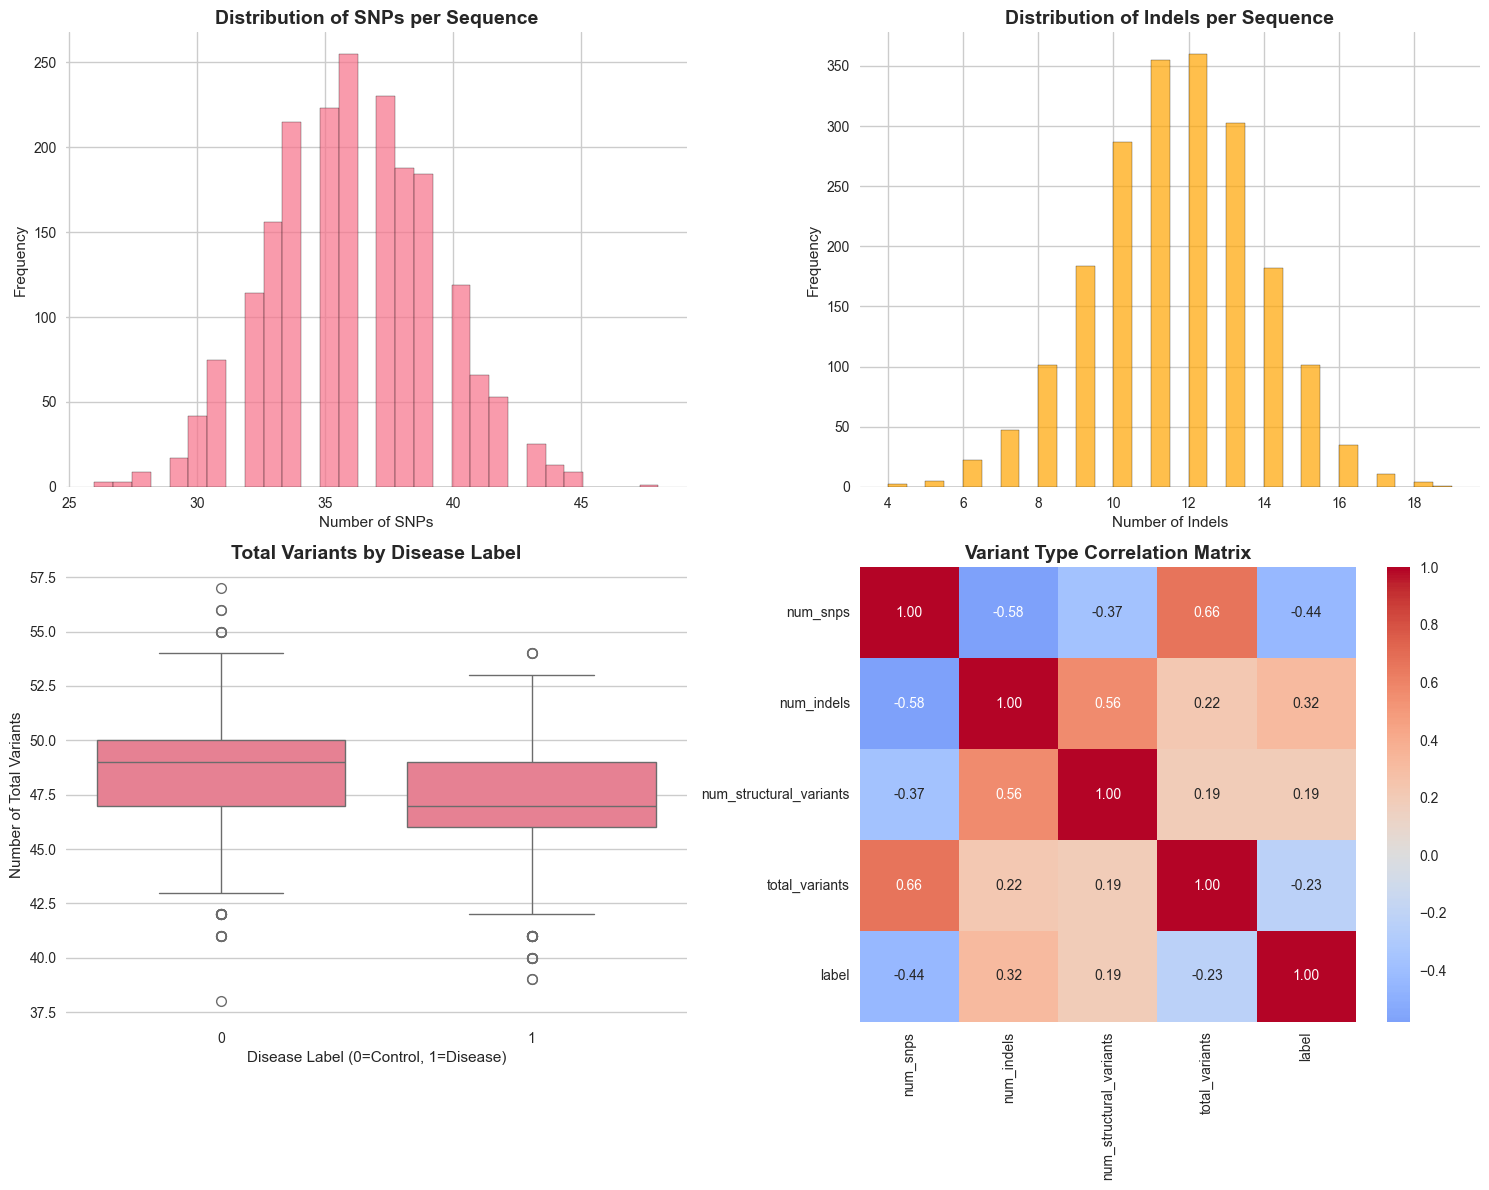

In [7]:
# Create visualizations
create_visualizations(results_df, '../results')

# Display some plots inline
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Variant distributions
axes[0, 0].hist(results_df['num_snps'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of SNPs per Sequence', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Number of SNPs')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(results_df['num_indels'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution of Indels per Sequence', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Number of Indels')
axes[0, 1].set_ylabel('Frequency')

# Disease association
sns.boxplot(data=results_df, x='label', y='total_variants', ax=axes[1, 0])
axes[1, 0].set_title('Total Variants by Disease Label', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Disease Label (0=Control, 1=Disease)')
axes[1, 0].set_ylabel('Number of Total Variants')

# Correlation
correlation_cols = ['num_snps', 'num_indels', 'num_structural_variants', 'total_variants', 'label']
corr_matrix = results_df[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Variant Type Correlation Matrix', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


## 7. Detailed Variant Analysis

Let's examine specific variants in detail


In [8]:
# Examine sequences with highest variant counts
print("Sequences with most variants:")
top_variants = results_df.nlargest(10, 'total_variants')
print(top_variants[['sequence_id', 'label', 'num_snps', 'num_indels', 'num_structural_variants', 'total_variants']])

# Example: Detailed analysis of first sequence with variants
example_idx = results_df[results_df['total_variants'] > 0].index[0]
example_analysis = identifier.analyze_sequence(
    df.loc[example_idx, 'Sequences'], 
    consensus
)

print(f"\n\nExample Analysis (Sequence ID: {example_idx}):")
print(f"Label: {df.loc[example_idx, 'Labels']}")
print(f"\nSNPs found: {len(example_analysis['snps'])}")
if example_analysis['snps']:
    print("First 5 SNPs:")
    for snp in example_analysis['snps'][:5]:
        print(f"  Position {snp['position']}: {snp['reference']} -> {snp['alternate']}")

print(f"\nIndels found: {len(example_analysis['indels'])}")
if example_analysis['indels']:
    print("First 3 Indels:")
    for indel in example_analysis['indels'][:3]:
        print(f"  Position {indel['position']}: {indel['type']}, Length: {indel['length']}")

print(f"\nStructural variants found: {len(example_analysis['structural_variants'])}")
if example_analysis['structural_variants']:
    print("First 3 Structural Variants:")
    for sv in example_analysis['structural_variants'][:3]:
        print(f"  Position {sv['position']}: {sv['type']}, Length: {sv['length']}")


Sequences with most variants:
      sequence_id  label  num_snps  num_indels  num_structural_variants  \
1147         1147      0        45          12                        0   
616           616      0        42          14                        0   
1915         1915      0        40          15                        1   
473           473      0        39          15                        1   
634           634      0        42          12                        1   
1105         1105      0        41          14                        0   
1331         1331      0        36          18                        1   
67             67      0        41          12                        1   
96             96      0        42          12                        0   
138           138      0        40          13                        1   

      total_variants  
1147              57  
616               56  
1915              56  
473               55  
634               55  
1105  